              age         sex          cp    trestbps        chol         fbs  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean    54.433333    0.677778    2.174074  131.344444  249.659259    0.148148   
std      9.109067    0.468195    0.950090   17.861608   51.686237    0.355906   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  213.000000    0.000000   
50%     55.000000    1.000000    2.000000  130.000000  245.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  280.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang    oldpeak       slope          ca  \
count  270.000000  270.000000  270.000000  270.00000  270.000000  270.000000   
mean     1.022222  149.677778    0.329630    1.05000    0.585185    0.670370   
std      0.997891   23.165717 

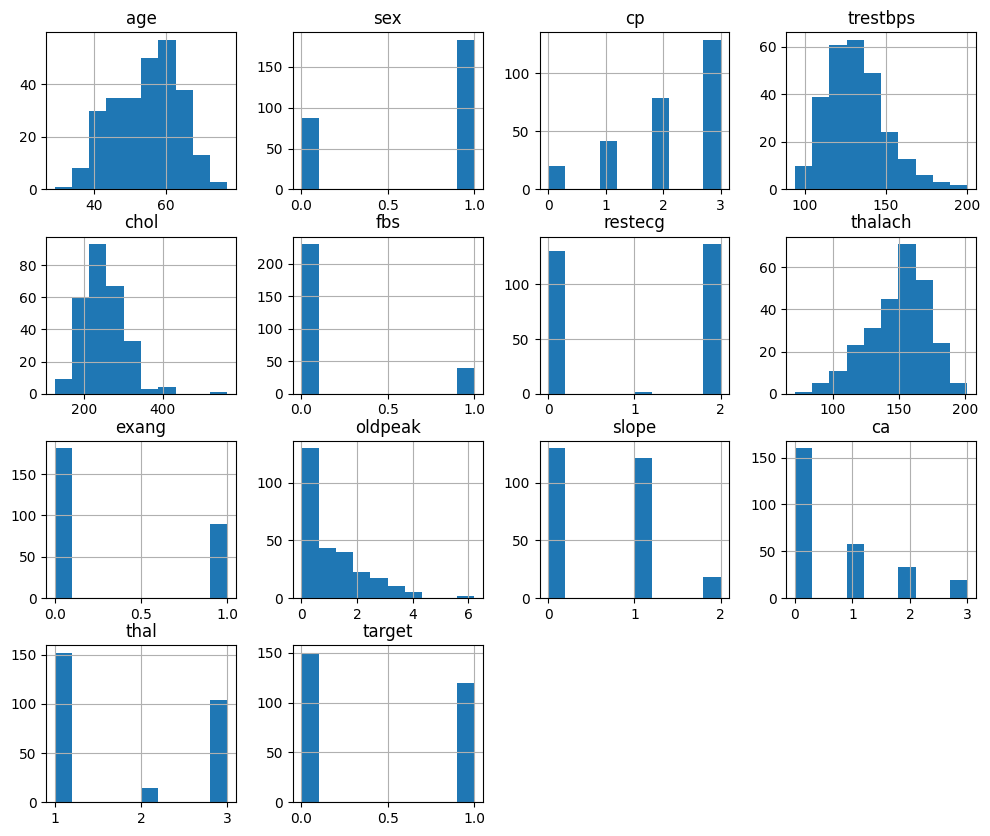

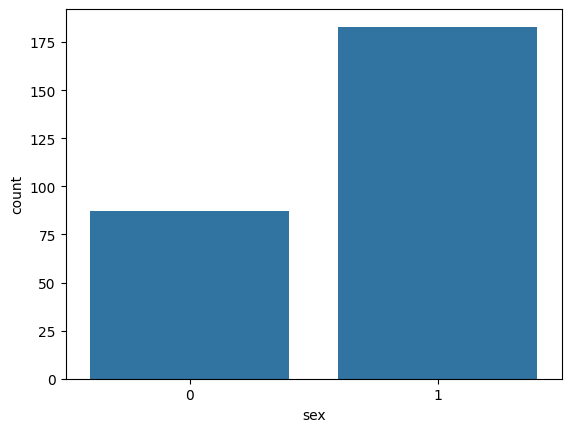

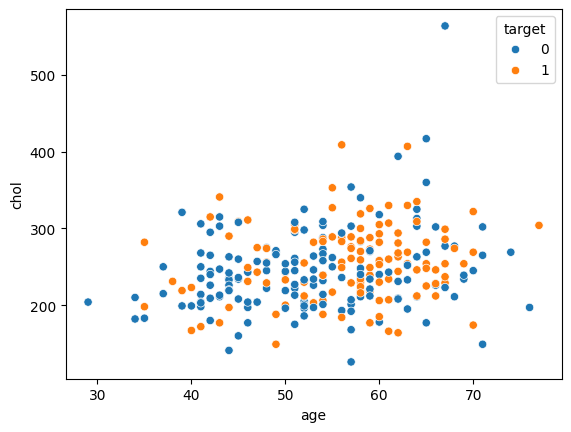

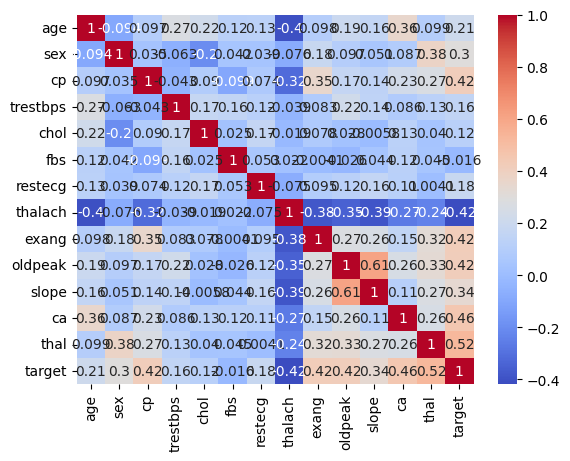

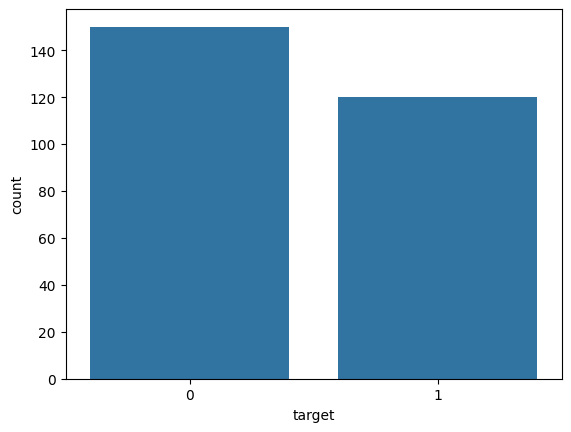

Acurácia do modelo de regressão logística: 0.9259259259259259
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



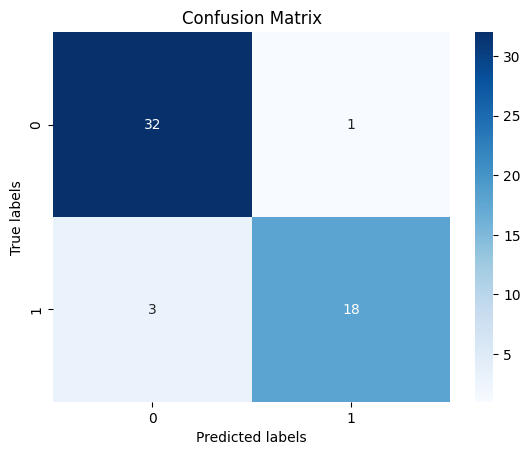

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar os dados
dados = pd.read_csv("/content/_Heart_disease_statlog.csv")

# Análise exploratória dos dados
print(dados.describe())  # Resumo estatístico
dados.hist(figsize=(12, 10))  # Histogramas para variáveis numéricas
plt.show()
sns.countplot(x='sex', data=dados)  # Gráfico de barra para variáveis categóricas
plt.show()
sns.scatterplot(x='age', y='chol', hue='target', data=dados)  # Gráfico de dispersão
plt.show()
correlacao = dados.corr()  # Matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.show()
sns.countplot(x='target', data=dados)  # Distribuição da variável alvo
plt.show()

# Dividir os dados em conjunto de treinamento e teste
X = dados.drop('target', axis=1)
y = dados['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de regressão logística com um número maior de iterações
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Prever os rótulos das classes no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo de regressão logística:", acuracia)

# Imprimir o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Plotar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**Análise Exploratória dos Dados:** Durante a análise exploratória dos dados, observamos que as variáveis ​​idade (age), sexo (sex), tipo de dor torácica (cp), pressão arterial em repouso (trestbps), colesterol sérico (chol), e outros apresentam uma distribuição variada. Por exemplo, a idade média dos pacientes é de aproximadamente 54 anos, e a maioria dos pacientes são do sexo masculino (aproximadamente 68%). Ao analisar a relação com a variável alvo (target), observamos que algumas variáveis, como a pressão arterial em repouso (trestbps) e o colesterol sérico (chol), podem apresentar diferenças significativas entre os pacientes com e sem doença cardíaca.



**Modelo de Regressão Logística:** Construímos um modelo de regressão logística para prever se um indivíduo sofre de doença cardíaca ou não. Utilizamos todas as variáveis disponíveis como recursos para treinar o modelo.




**Análise do Resultado da Regressão Logística e Matriz de Confusão:** Após treinar o modelo de regressão logística, avaliamos seu desempenho utilizando métricas como acurácia, precisão, recall e F1-Score. Com uma acurácia de aproximadamente 92.59%, podemos concluir que o modelo tem uma boa capacidade de previsão. No entanto, ao analisar a matriz de confusão, observamos que o modelo teve alguns falsos positivos e falsos negativos. Isso significa que houve instâncias em que o modelo classificou incorretamente pacientes como tendo ou não tendo doença cardíaca. Portanto, embora a acurácia seja alta, devemos considerar outras métricas, como precisão e recall, para uma avaliação mais completa do modelo.